# VISUALIZATION of FACES WITH MEDICAL MASKS

## Libraries

In [61]:
# /// Basic libraries
import numpy as np
import pandas as pd
import random

# /// Path files and xml manipulation
from os.path import isfile, join
import xmltodict #library that treats xmls as json files
import os
from os import listdir #os library that lists all the directories

# /// Image processing
import cv2 #opencv

# /// Visualization
import matplotlib.pyplot as plt
import seaborn as sns



In addition, we are going to install torchvision through pytorch. 


This is a utility library that downloads and prepares public datasets.


The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.

In [62]:
# /// Torchvision
import torchvision #pytorch library , contains useful attributes and functionalities
import torch #Pytorch
import torchvision.models as models #we will import pretrained model resnet 50
import torchvision.transforms as transforms  #for various transformations for preprocessing
import torchvision.datasets as datasets

## Functions

In [63]:
def ImageNamesExtraction():
    
    """
    This function give us all the image names of our dataset
    """
    
    image_names = []
    for dirname, _, filenames in os.walk('../ih-final-project/data/medical-masks-dataset/images'):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            extension = fullpath[len(fullpath) - 4:]
            if extension != '.xml':
                image_names.append(filename)
    return image_names


In [64]:
image_names = ImageNamesExtraction() #getting the image names

In [65]:
image_names

['-1x-1.jpg',
 '-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM.jpeg',
 '0002526673.jpg',
 '0009S6815V3PEU1N-C123-F4.jpg',
 '000_1OC3DT.jpg',
 '000_1ov3n5_0.jpeg',
 '000b7b75-1600.jpg',
 '001_1024.jpeg',
 '002_1024.jpeg',
 '003_1024.jpeg',
 '004_1024.jpeg',
 '0109-00176-096b1.jpg',
 '012106.jpg_1140x855.jpg',
 '012420_coronoa_masks_web.jpg',
 '0200b38c89b16c37c5de8e247bb00c2f.jpg',
 '0209-00176-076b1.jpg',
 '022814asiatodaymasks_960x540.jpg',
 '025418_springwest005.jpg',
 '0450908675_50159485_mutation-virus-chine-inquietude.jpg',
 '0602623232127-web-tete.jpg',
 '08165739.jpg',
 '08_11_2019-airpollution_234_19737819_192539446.jpg',
 '0_10725.jpg',
 '0_8w7mkX-PHcfMM5s6.jpeg',
 '0_Concern-In-China-As-Mystery-Virus-Spreads.jpg',
 '0ad90195-cd77-489e-bf85-08c83b80d3e0.jpg',
 '1-200102094256105.png',
 '1000x-1.jpg',
 '101d6660a8974050b613dd2e6bd59390.jpg',
 '1024x576_939430607723.jpg',
 '1024x737_09186876046.jpg',
 '1029731146.jpg',
 '1030611863.jpg',
 '1042977068.jpg',
 '10fea_8011463765e2aa28b

In [66]:
def path_separation(image_name):
    
    """
    This function extract the image and label path to reassign the same name to both files.
    And return the new image and label path of the images.
    
    """
    
    path_master = '../ih-final-project/data/medical-masks-dataset/'
    image_path = path_master + 'images/' + image_name
    
    if image_name[-4:] == 'jpeg':
        label_name = image_name[:-5] + '.xml'
    else:
        label_name = image_name[:-4] + '.xml'
    
    label_path = path_master + 'labels/' + label_name
        
    return  image_path, label_path

In [67]:
def parse_xml(label_path):

    """
    With this function we can obtain the necessary information of each image.
    XML files contain their descriptions like their locations, bounding box and labels good, none or bad.
    
    """
    
    x = xmltodict.parse(open(label_path , 'rb'))
    item_list = x['annotation']['object']
    
    # when image has only one bounding box we use isinstance
    if not isinstance(item_list, list):
        item_list = [item_list]
        
    result = []
    
    for item in item_list:
        name = item['name']
        bndbox = [(int(item['bndbox']['xmin']), int(item['bndbox']['ymin'])),
                  (int(item['bndbox']['xmax']), int(item['bndbox']['ymax']))]       
        result.append((name, bndbox))
    
    size = [int(x['annotation']['size']['width']), 
            int(x['annotation']['size']['height'])]
    
    # result contains name(good, bad, none) and its box's coords
    # size contains width and height of bounding box
    return result, size  

In [68]:
def visualize_image(image_name, bndbox=True):

    """
    This function help us to visualize the images that we want with a common size.
    """
    
    image_path, label_path = path_separation(image_name)
    
    image = cv2.imread(image_path)  #reading the image using opencv's imread function
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #converting image to RGB format as opencv reads image in BGR format
    
    if bndbox:  #boundbox true
        labels, size = parse_xml(label_path)
        thickness = int(sum(size)/400.)
        
        for label in labels:
            name, bndbox = label #label contains image info
            
            if name == 'good':  # draw a green bounding box  
                cv2.rectangle(image, bndbox[0], bndbox[1], (0, 255, 0), thickness)
            elif name == 'bad': # draw a red bounding box
                cv2.rectangle(image, bndbox[0], bndbox[1], (255, 0, 0), thickness)
            else: # draw a blue box
                cv2.rectangle(image, bndbox[0], bndbox[1], (0, 0, 255), thickness)
    
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title(image_name)
    plt.imshow(image)
    plt.show()

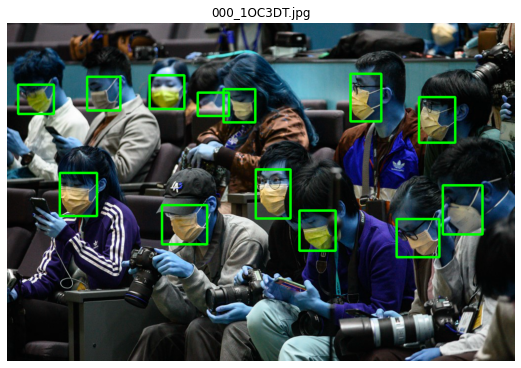

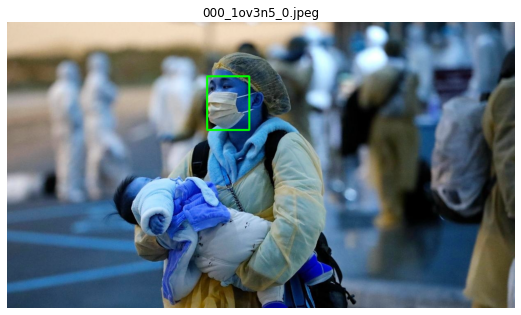

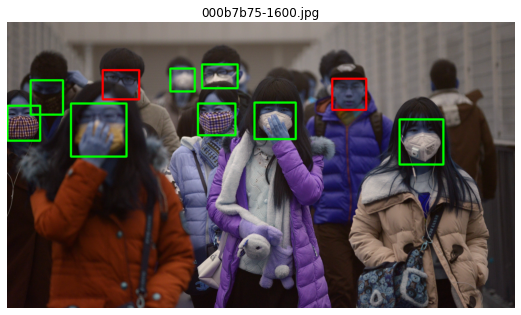

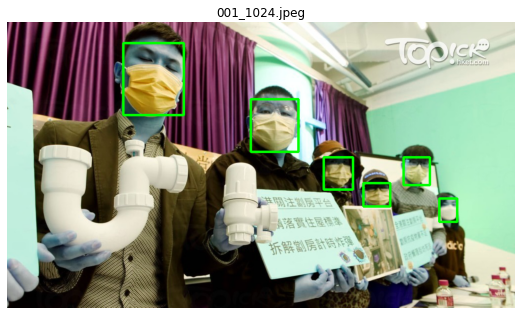

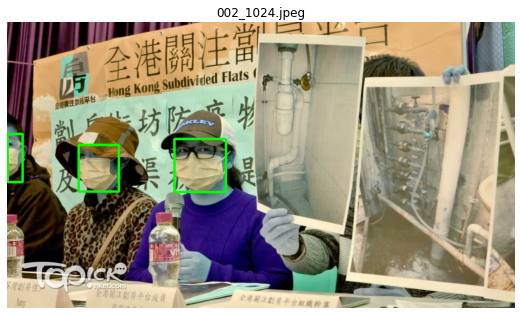

In [70]:
#PREVISUALIZATION OF BOUNDING BOXES IN IMAGES 
# GREEN --> MASK
# RED --> NO MASK
N = 5
for i in range(N):
    visualize_image(image_names[i+4])